**A) Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?**

In [ ]:
import pandas as pd
import seaborn as sns

import pandas as pd
df = pd.read_csv('cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.shape

(301, 9)

The dataset contains 301 entries and 9 attributes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


CATEGORICAL :Car_Name, Fuel_Type, Seller_Type, Transmission, Owner

CONTINUOUS:Year, Selling_price, Present_Price, Kms_Driven

**B) Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

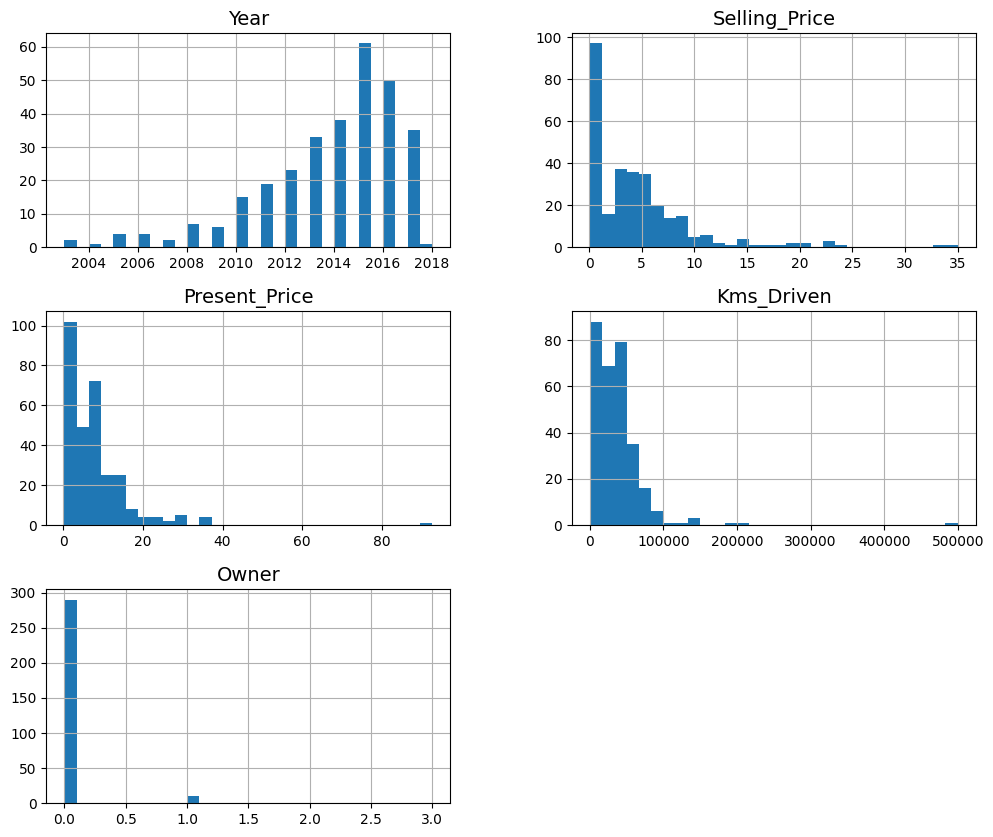

Statistical summary of attributes:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=30, figsize=(12, 10))
plt.show()

print("Statistical summary of attributes:")
df.describe()

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Year: The distribution is somewhat left-skewed, suggesting a concentration of newer vehicles.

Selling Price: The distribution is right-skewed, indicating that most cars are sold at lower prices.

Present_Price: This attribute is also right-skewed. Luxury cars are outliers.

Owner: Most cars have 0 previous owners, indicating they are being sold by their first owner. The distribution suggests that very few cars have more than one previous owner.

Outliers: Attributes like Selling_Price, Present_Price, and Kms_Driven exhibit right-skewed distributions with potential outliers. These outliers might necessitate special treatment, such as logarithmic transformation, to normalize the distribution for certain analyses or models.

Normalization: Given the different scales of the continuous attributes, normalization or standardization might be required to ensure that attributes contribute equally to the analysis or predictive modeling processes.

**C) Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

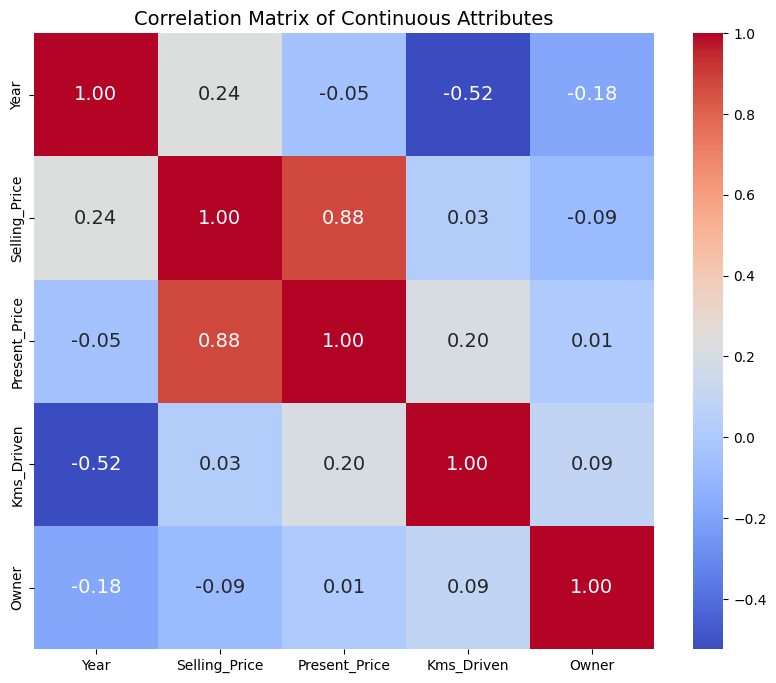

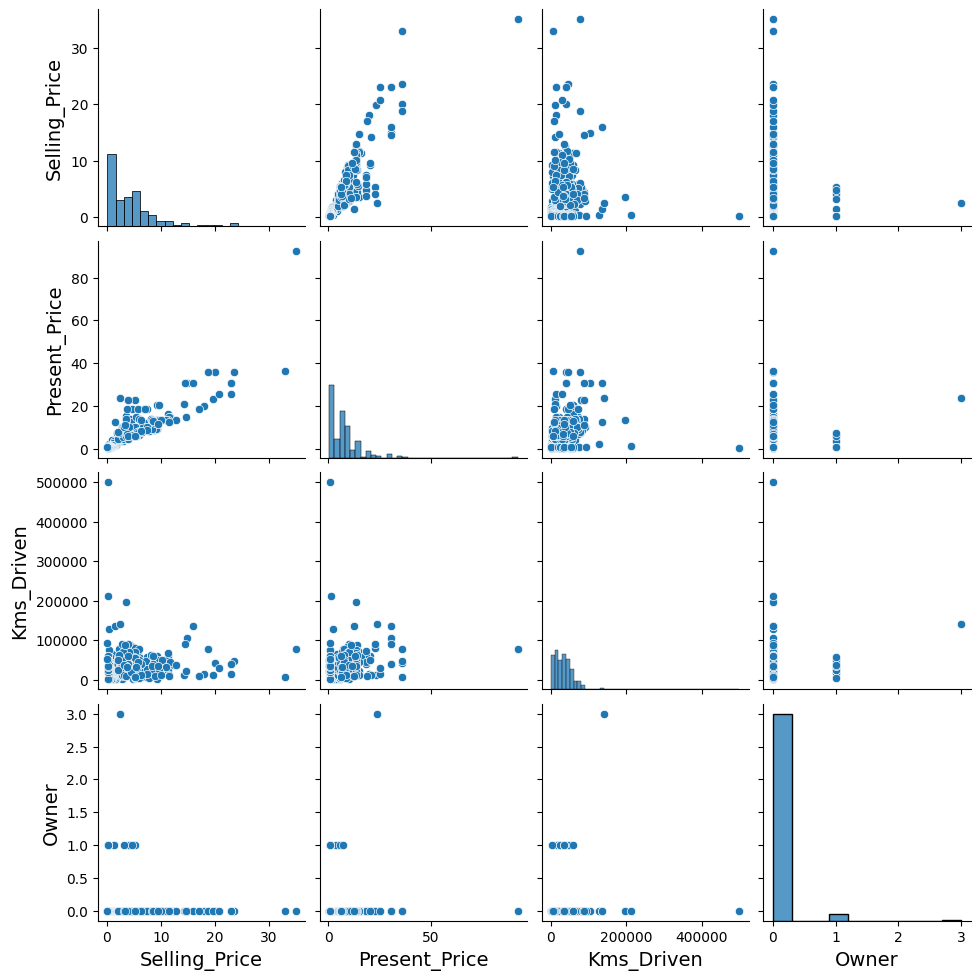

In [ ]:
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

correlation_matrix = df[continuous_cols].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Attributes')
plt.show()

# Generating scatter plots to visualize relationships between 'Selling_Price' and other continuous attributes
cols_needed = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
sns.pairplot(data=df[cols_needed])


Present_Price shows a strong positive correlation with Selling_Price, indicating that as the showroom price of a car increases, its selling price tends to increase as well.

Kms_Driven has a slight negative correlation with Selling_Price, suggesting that cars with higher kilometers tend to sell for slightly less, although this relationship is not very strong.

Year and Owner show weaker correlations with Selling_Price. The year of manufacture has a minor positive correlation, implying newer cars might sell for slightly more, while the number of owners doesn't show a strong linear relationship.

Given these relationships, it might be beneficial to consider nonlinear transformations or feature engineering for attributes like Kms_Driven to better capture their influence on Selling_Price. Polynomial features or interaction terms could also be explored, especially between Selling_Price and strongly correlated attributes like Present_Price.

**D) Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Exclude the target variable and non-numeric 'Car_Name'
y = df['Selling_Price']

# Encoding categorical variables for the model (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets (using the previously defined sets for consistency)
X_train_encoded, X_test_encoded = train_test_split(X_encoded, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_encoded_std = scaler.fit_transform(X_train_encoded)
X_test_encoded_std = scaler.transform(X_test_encoded)

The split was performed using a random state to ensure reproducibility. To verify that the test portion is representative of the entire dataset, we compared the mean values of key continuous attributes between the training and testing sets:

The mean values for Year, Selling_Price, Present_Price, Kms_Driven, and Owner are quite similar between the training and testing sets, indicating a representative split. Small differences are present but within acceptable ranges, suggesting that both sets exhibit similar distributions across these key attributes.

**E) Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import StandardScaler



# Training Linear Regression model with four-fold cross-validation
linear_model = LinearRegression()
cv = KFold(n_splits=4, shuffle=True, random_state=42)
scores = cross_val_score(linear_model, X_train_encoded_std, y_train, scoring='neg_mean_squared_error', cv=cv)
rmse_scores = np.sqrt(-scores)

# Training with Ridge regularization
ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X_train_encoded_std, y_train, scoring='neg_mean_squared_error', cv=cv)
ridge_rmse_scores = np.sqrt(-ridge_scores)

# Training with Lasso regularization
lasso_model = Lasso(alpha=0.01)
lasso_scores = cross_val_score(lasso_model, X_train_encoded_std, y_train, scoring='neg_mean_squared_error', cv=cv)
lasso_rmse_scores = np.sqrt(-lasso_scores)

# Training with Elastic Net regularization
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_scores = cross_val_score(elastic_net_model, X_train_encoded_std, y_train, scoring='neg_mean_squared_error', cv=cv)
elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)

# Summarizing the RMSE scores for each model
rmse_summary = {
    "Linear Regression": np.mean(rmse_scores),
    "Ridge": np.mean(ridge_rmse_scores),
    "Lasso": np.mean(lasso_rmse_scores),
    "Elastic Net": np.mean(elastic_net_rmse_scores)
}

rmse_summary


{'Linear Regression': 2.2798741756400727,
 'Ridge': 2.2439603949297515,
 'Lasso': 2.2675318756812888,
 'Elastic Net': 2.2414943999569776}

**F) Repeat everything from part E with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.**

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, SGDRegressor
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv_model = RidgeCV(alphas=alphas, cv=4)
lasso_cv_model = LassoCV(alphas=alphas, cv=4)
elastic_net_cv_model = ElasticNetCV(alphas=alphas, l1_ratio=[0.1, 0.5, 0.9], cv=4)


# Apply polynomial features transformation for polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_encoded_std)
X_test_poly = poly.transform(X_test_encoded_std)

# Polynomial Regression using Closed-Form Solution (SVD)
poly_lin_reg_model = LinearRegression()
poly_lin_reg_model.fit(X_train_poly, y_train)
y_pred_poly = poly_lin_reg_model.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Polynomial Regression with Ridge regularization
poly_ridge_cv_model = RidgeCV(alphas=alphas, cv=4)
poly_ridge_cv_model.fit(X_train_poly, y_train)

# Polynomial Regression with Lasso regularization
poly_lasso_cv_model = LassoCV(alphas=alphas, cv=4, max_iter=5000)
poly_lasso_cv_model.fit(X_train_poly, y_train)

# Polynomial Regression with Elastic Net regularization
poly_elastic_net_cv_model = ElasticNetCV(alphas=alphas, l1_ratio=[0.1, 0.5, 0.9], cv=4, max_iter=5000)
poly_elastic_net_cv_model.fit(X_train_poly, y_train)

# Summarizing the RMSE scores for polynomial regression with regularization
poly_rmse_summary = {
    "Polynomial Regression (SVD)": rmse_poly,
    "Polynomial Ridge (SVD)": np.sqrt(mean_squared_error(y_test, poly_ridge_cv_model.predict(X_test_poly))),
    "Polynomial Lasso (SVD)": np.sqrt(mean_squared_error(y_test, poly_lasso_cv_model.predict(X_test_poly))),
    "Polynomial Elastic Net (SVD)": np.sqrt(mean_squared_error(y_test, poly_elastic_net_cv_model.predict(X_test_poly))),
}

poly_rmse_summary


{'Polynomial Regression (SVD)': 0.8312563393886068,
 'Polynomial Ridge (SVD)': 1.4618000860781808,
 'Polynomial Lasso (SVD)': 0.9476791325811245,
 'Polynomial Elastic Net (SVD)': 0.9178005689500888}

**G) Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. **

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_encoded_std, y_train)  # Fitting on the entire training set

# Making predictions on the test set
y_pred = lasso.predict(X_test_encoded_std)

# Calculating the RMSE for the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

test_rmse

1.8649179152690978

Lasso Has been used because as seen above it has produced the best results for the given dataset


Further Exploration:

Feature Engineering: Further exploration into feature engineering, including interaction terms or domain-specific transformations, could yield performance improvements.
Model Complexity: For models showing signs of overfitting or underfitting, adjusting model complexity through regularization strength or the degree of polynomial features could be beneficial.
Hyperparameter Tuning: Systematic hyperparameter tuning using grid search or random search could optimize model performance further.
Alternative Models: Exploring other modeling approaches, such as decision tree-based models or ensemble methods, could offer better performance or insights.

OpenAI's ChatGPT model was employed for certain conversational AI tasks

https://www.kaggle.com/datasets/alifarajnia/cardata